# Pythonのバージョンをグラフにする

* 参考: https://en.wikipedia.org/wiki/History_of_Python
* 参考: https://matplotlib.org/gallery/lines_bars_and_markers/timeline.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

histories = [
    {
        'name': 'Python 1.x',
        'versions': [
            ('0.9', '1991-02-20'),
            ('1.0', '1994-01-26'),
            ('1.1', '1994-10-11'),
            ('1.2', '1995-04-13'),
            ('1.3', '1995-10-13'),
            ('1.4', '1996-10-25'),
            ('1.5', '1998-01-03'),
            ('1.6', '2000-09-05'),
        ]
    },
    {
        'name': 'Python 2.x',
        'versions': [
            ('2.0', '2000-10-16'),
            ('2.1', '2001-04-15'),
            ('2.2', '2001-12-21'),
            ('2.3', '2003-07-29'),
            ('2.4', '2004-11-30'),
            ('2.5', '2006-09-19'),
            ('2.6', '2008-10-01'),
            ('2.7', '2010-07-03'),
            # ('2.7.16', '2019-03-04'),
            ('End of Life', '2020-01-01')
        ]
    },
    {
        'name': 'Python 3.x',
        'versions': [
            ('3.0', '2008-12-03'),
            ('3.1', '2009-06-27'),
            ('3.2', '2011-02-20'),
            ('3.3', '2012-09-29'),
            ('3.4', '2014-03-16'),
            ('3.5', '2015-09-13'),
            ('3.6', '2016-12-23'),
            ('3.7', '2018-06-27'),
            ('3.8', '2019-10-21'),
        ]
    },
]

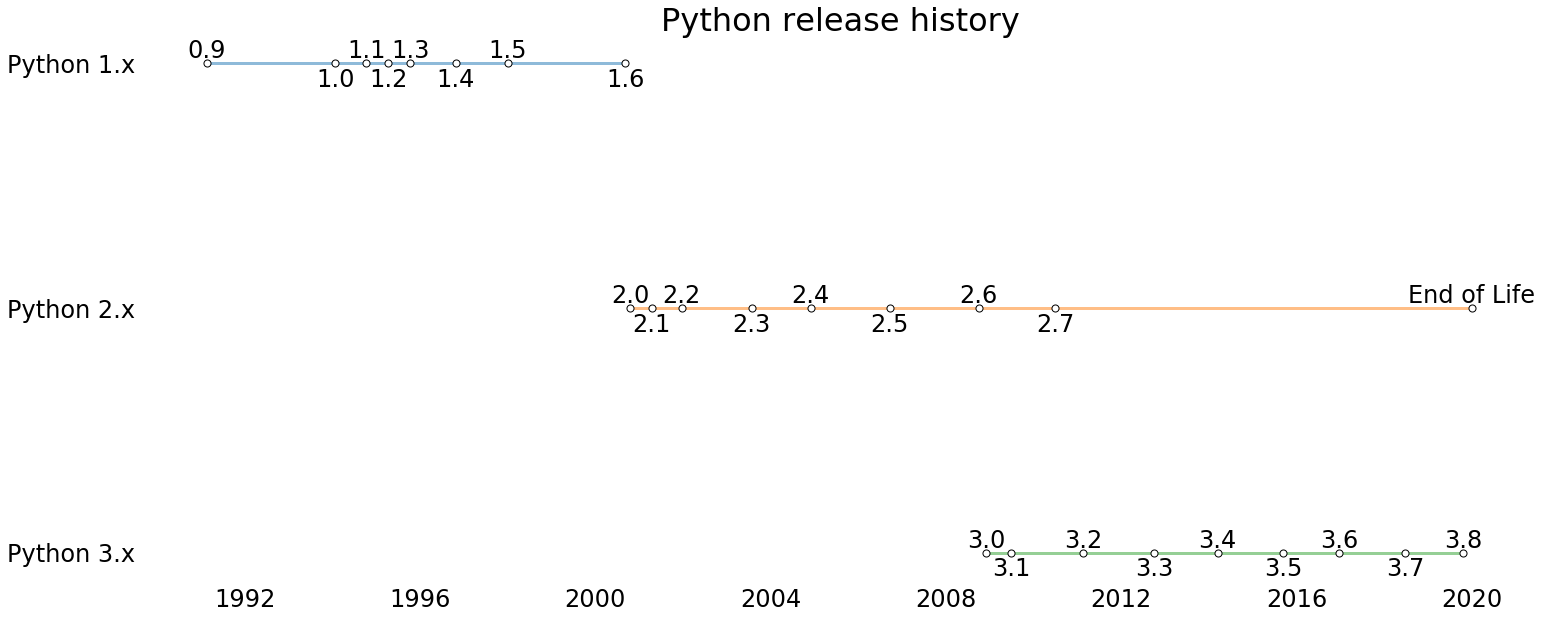

In [2]:
fig, ax = plt.subplots(figsize=(25, 10))

names = []
for i, history in enumerate(histories):
    # 縦軸の位置を決める
    level = 2 - i
    names.append(history['name'])
    for ii, (version, dt) in enumerate(history['versions']):
        # 日付に変換
        dt = datetime.strptime(dt, "%Y-%m-%d")
        # 線の開始と終了を決める
        if ii == 0:
            start = dt
        else:
            stop = dt

        # 点を描画
        ax.scatter(dt, level, s=50, facecolor='w', edgecolor='k', zorder=9999)

        # 文字の配置
        vert = 'bottom'
        margin = 0
        if ii % 2 == 1:
            vert = 'top'
            margin = -0.02
        # バージョン情報を描画
        ax.text(dt, level + margin, version,
                horizontalalignment='center', verticalalignment=vert, fontsize=24)
    ax.plot((start, stop), (level, level), alpha=.5, linewidth=3)

ax.set_title("Python release history", fontsize=32)
plt.yticks(np.arange(len(histories)), reversed(names), fontsize=24)
plt.xticks(fontsize=24)

# Remove components for a cleaner look
plt.setp((ax.get_yticklines() + ax.get_xticklines() +
          list(ax.spines.values())), visible=False)
plt.savefig('history.png')
plt.show()